In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout , BatchNormalization
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam
from pylab import rcParams
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report , accuracy_score
from mlxtend.plotting import plot_confusion_matrix

Using TensorFlow backend.


In [2]:
df = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

print(df.shape, test.shape)
print('Data Directory : ', os.listdir("./data"))
print(df.Activity.value_counts())
df.T

(7352, 563) (2947, 563)
Data Directory :  ['test.csv', 'train.csv']
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,7342,7343,7344,7345,7346,7347,7348,7349,7350,7351
tBodyAcc-mean()-X,0.288585,0.278419,0.279653,0.279174,0.276629,0.277199,0.279454,0.277432,0.277293,0.280586,...,0.276137,0.29423,0.221206,0.207861,0.237966,0.299665,0.273853,0.273387,0.289654,0.351503
tBodyAcc-mean()-Y,-0.0202942,-0.0164106,-0.0194672,-0.0262006,-0.0165697,-0.0100979,-0.0196408,-0.0304883,-0.0217507,-0.0099603,...,-0.108046,-0.0399683,-0.0363901,0.0634229,-0.00108781,-0.0571934,-0.00774933,-0.0170106,-0.018843,-0.0124231
tBodyAcc-mean()-Z,-0.132905,-0.12352,-0.113462,-0.123283,-0.115362,-0.105137,-0.110022,-0.12536,-0.120751,-0.106065,...,-0.056677,-0.143397,-0.167651,-0.220567,-0.148326,-0.181233,-0.147468,-0.0450218,-0.158281,-0.203867
tBodyAcc-std()-X,-0.995279,-0.998245,-0.99538,-0.996091,-0.998139,-0.997335,-0.996921,-0.996559,-0.997328,-0.994803,...,-0.230796,-0.230396,-0.176954,-0.244758,-0.218949,-0.195387,-0.235309,-0.218218,-0.219139,-0.26927
tBodyAcc-std()-Y,-0.983111,-0.9753,-0.967187,-0.983403,-0.980817,-0.990487,-0.967186,-0.966728,-0.961245,-0.972758,...,-0.140521,-0.133669,-0.0501467,-0.0321591,-0.0129267,0.0399048,0.00481628,-0.103822,-0.111412,-0.0872115
tBodyAcc-std()-Z,-0.913526,-0.960322,-0.978944,-0.990675,-0.990482,-0.99542,-0.983118,-0.981585,-0.983672,-0.986244,...,0.117919,0.0958697,0.0751283,0.118361,0.170019,0.0770781,0.05928,0.274533,0.268893,0.177404
tBodyAcc-mad()-X,-0.995112,-0.998807,-0.99652,-0.997099,-0.998321,-0.997627,-0.997003,-0.996485,-0.997596,-0.995405,...,-0.300133,-0.308265,-0.269247,-0.339273,-0.309599,-0.282301,-0.322552,-0.304515,-0.310487,-0.377404
tBodyAcc-mad()-Y,-0.983185,-0.974914,-0.963668,-0.98275,-0.979672,-0.990218,-0.966097,-0.966313,-0.957236,-0.973663,...,-0.102807,-0.112551,-0.0273262,-0.0888948,-0.0413923,0.0436156,-0.0294562,-0.098913,-0.0682003,-0.0386781
tBodyAcc-mad()-Z,-0.923527,-0.957686,-0.977469,-0.989302,-0.990441,-0.995549,-0.983116,-0.982982,-0.984379,-0.985642,...,0.181639,0.162174,0.110784,0.146128,0.207454,0.0604101,0.0805851,0.332584,0.319473,0.22943
tBodyAcc-max()-X,-0.934724,-0.943068,-0.938692,-0.938692,-0.942469,-0.942469,-0.940987,-0.940987,-0.940598,-0.940028,...,0.236195,0.185661,0.185661,0.118226,0.210795,0.210795,0.11744,0.0439988,0.101702,0.269013


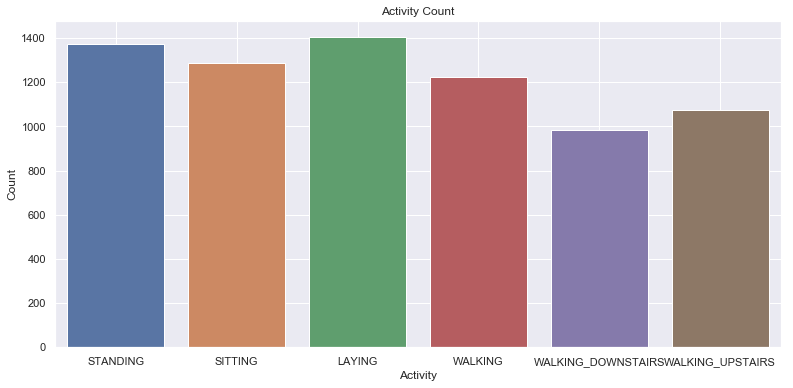

In [3]:
sns.set(rc={'figure.figsize':(13,6)})
fig = sns.countplot(x = "Activity" , data = df)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Activity Count")
plt.grid(True)
plt.show(fig)

In [4]:
pd.crosstab(df.subject, df.Activity, margins=True).style.background_gradient(cmap='autumn_r')

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,All
subject,,,,,,,
1,50,47,53,95,49,53,347
3,62,52,61,58,49,59,341
5,52,44,56,56,47,47,302
6,57,55,57,57,48,51,325
7,52,48,53,57,47,51,308
8,54,46,54,48,38,41,281
11,57,53,47,59,46,54,316
14,51,54,60,59,45,54,323
15,72,59,53,54,42,48,328


# visualizations for feature distribution in space

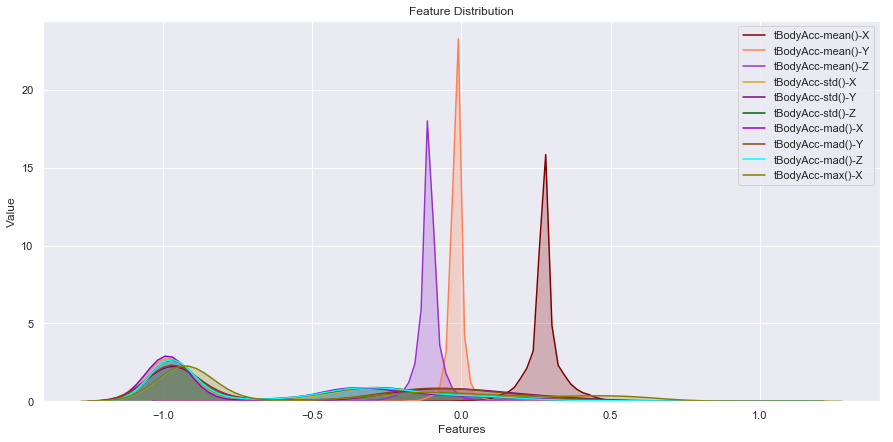

In [7]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in df.columns[0:10]:
    index = index + 1
    
    fig = sns.kdeplot(df[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

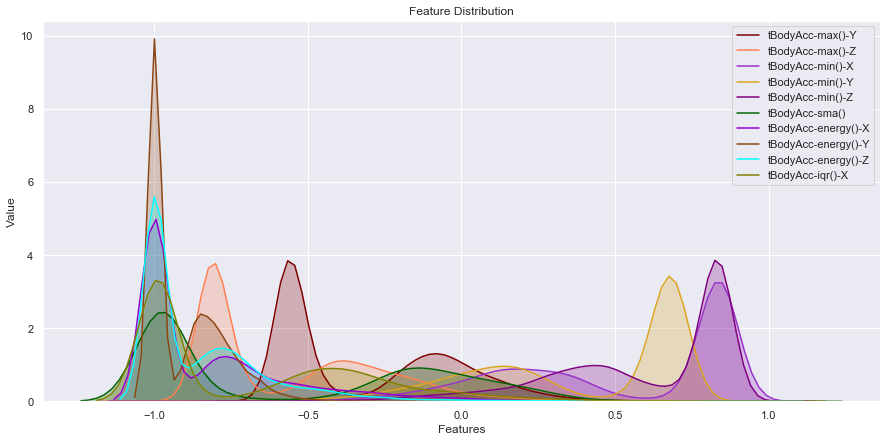

In [6]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in df.columns[10:20]:
    index = index + 1
    ax1 = sns.kdeplot(df[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

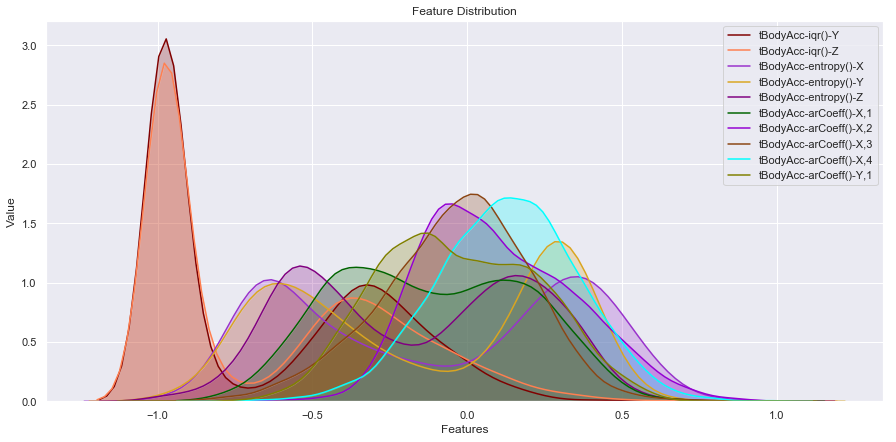

In [7]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in df.columns[20:30]:
    index = index + 1
    ax1 = sns.kdeplot(df[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

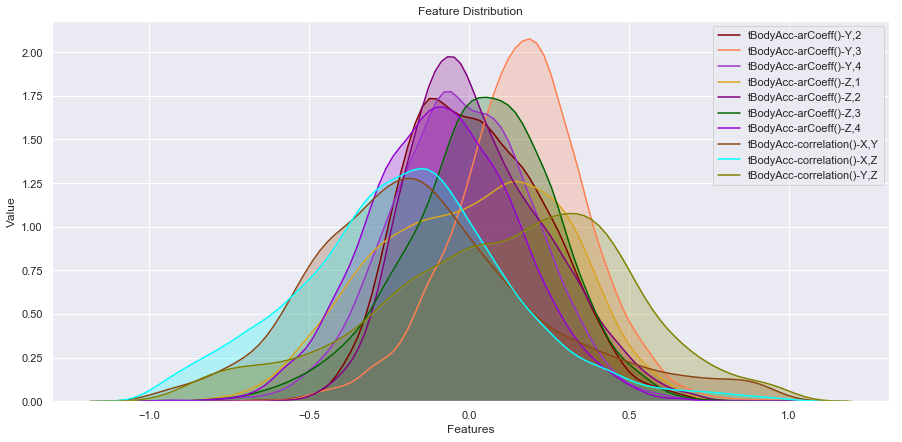

In [8]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in df.columns[30:40]:
    index = index + 1
    ax1 = sns.kdeplot(df[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

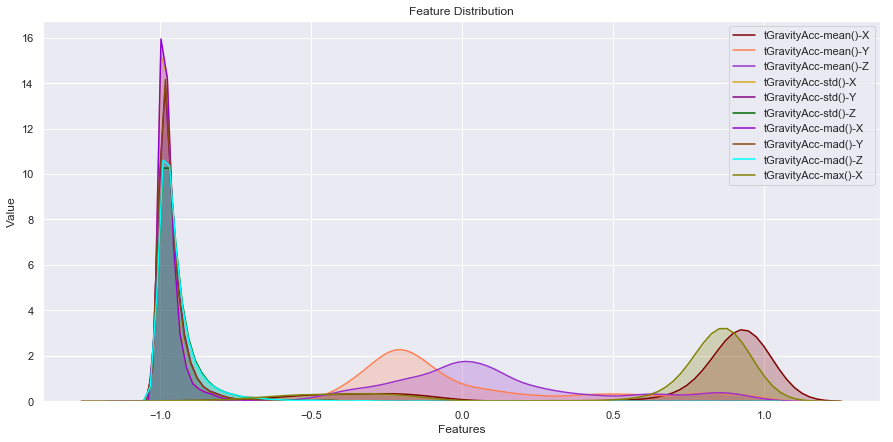

In [9]:
sns.set(rc={'figure.figsize':(15,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in df.columns[40:50]:
    index = index + 1
    ax1 = sns.kdeplot(df[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

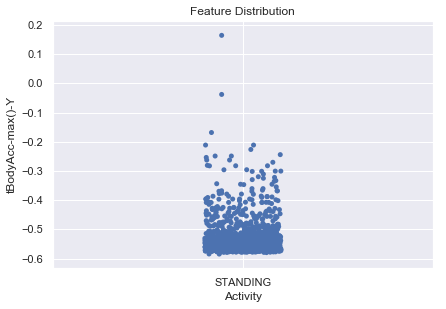

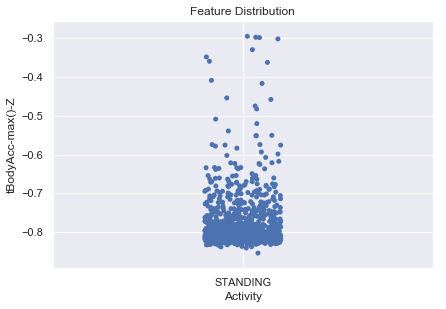

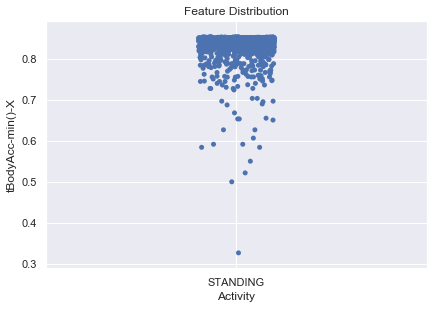

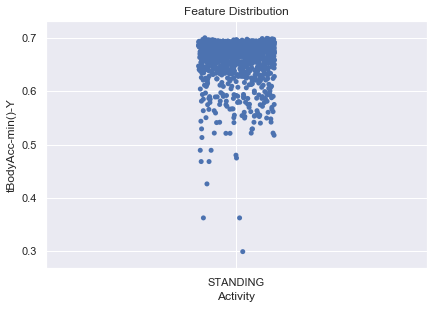

In [10]:
sns.set(rc={'figure.figsize':(15,10)})
plt.subplot(221)
fig1 = sns.stripplot(x='Activity', y= df.loc[df['Activity']=="STANDING"].iloc[:,10], data= df.loc[df['Activity']=="STANDING"], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig1)
plt.subplot(224)
fig2 = sns.stripplot(x='Activity', y= df.loc[df['Activity']=="STANDING"].iloc[:,11], data= df.loc[df['Activity']=="STANDING"], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig2)
plt.subplot(223)
fig2 = sns.stripplot(x='Activity', y= df.loc[df['Activity']=="STANDING"].iloc[:,12], data= df.loc[df['Activity']=="STANDING"], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig2)
plt.subplot(222)
fig2 = sns.stripplot(x='Activity', y= df.loc[df['Activity']=="STANDING"].iloc[:,13], data= df.loc[df['Activity']=="STANDING"], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig2)

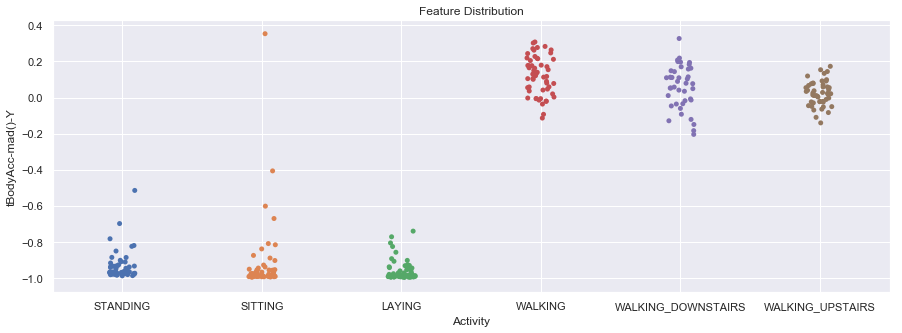

In [11]:
sns.set(rc={'figure.figsize':(15,5)})
fig1 = sns.stripplot(x='Activity', y= df.loc[df['subject']==15].iloc[:,7], data= df.loc[df['subject']==15], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig1)

**Feature Scaling : Pre-processing and data preparation to feed data into Artificial Neural Network.**

In [12]:
scaler = MinMaxScaler()
scaler.fit(df.iloc[:,0:562].astype(float))
mat_train = scaler.transform(df.iloc[:,0:562].astype(float))
print(mat_train)

[[0.64429225 0.48985291 0.43354743 ... 0.79825103 0.47068654 0.        ]
 [0.63920942 0.49179472 0.4382399  ... 0.79848665 0.47284164 0.        ]
 [0.63982653 0.49026642 0.44326915 ... 0.79872236 0.47544109 0.        ]
 ...
 [0.63669369 0.49149469 0.47748909 ... 0.84506893 0.52040559 1.        ]
 [0.64482708 0.49057848 0.42085971 ... 0.84323381 0.51266974 1.        ]
 [0.67575173 0.49378844 0.39806642 ... 0.84348837 0.51834742 1.        ]]


In [13]:
scaler = MinMaxScaler()
scaler.fit(test.iloc[:,0:562].astype(float))
mat_test = scaler.transform(test.iloc[:,0:562].astype(float))
print(mat_test)

[[0.6718788  0.55764282 0.52464834 ... 0.62209457 0.46362736 0.        ]
 [0.69470427 0.57426358 0.42707858 ... 0.62446791 0.45014396 0.        ]
 [0.68636345 0.55310221 0.42794829 ... 0.62380956 0.45251181 0.        ]
 ...
 [0.74529355 0.64526771 0.43015674 ... 0.62088108 0.58803909 1.        ]
 [0.65638384 0.62620241 0.44817885 ... 0.61581385 0.59135763 1.        ]
 [0.58994885 0.56560474 0.41032069 ... 0.61537208 0.59163879 1.        ]]


In [14]:
temp = []
for i in df.Activity:
    if i == "WALKING": temp.append(0)
    if i == "WALKING_UPSTAIRS": temp.append(1)
    if i == "WALKING_DOWNSTAIRS": temp.append(2)
    if i == "SITTING": temp.append(3)
    if i == "STANDING": temp.append(4)
    if i == "LAYING": temp.append(5)
df["n_Activity"] = temp

In [15]:
temp = []
for i in test.Activity:
    if i == "WALKING": temp.append(0)
    if i == "WALKING_UPSTAIRS": temp.append(1)
    if i == "WALKING_DOWNSTAIRS": temp.append(2)
    if i == "SITTING": temp.append(3)
    if i == "STANDING": temp.append(4)
    if i == "LAYING": temp.append(5)
test["n_Activity"] = temp

In [16]:
df.drop(["Activity"] , axis = 1 , inplace = True)
test.drop(["Activity"] , axis = 1 , inplace = True)

In [17]:
y_train = to_categorical(df.n_Activity , num_classes=6)
y_test = to_categorical(test.n_Activity , num_classes=6)

In [18]:
X_train = mat_train 
X_test = mat_test

In [19]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(7352, 562) (7352, 6)
(2947, 562) (2947, 6)


In [20]:
filepath="HAR_weights.hdf5"

lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=0.0001, patience=1, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# ANN Model

In [21]:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1] , activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer = Adam(lr = 0.0005),loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                36032     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 196)               25284     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                12608     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
__________

In [22]:
history = model.fit(X_train, y_train , epochs=30 , batch_size = 256 , validation_data=(X_test, y_test) , callbacks=[checkpoint,lr_reduce])

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 9s 1ms/step - loss: 1.3490 - acc: 0.5994 - val_loss: 0.8079 - val_acc: 0.5874

Epoch 00001: val_acc improved from -inf to 0.58738, saving model to HAR_weights.hdf5
Epoch 2/30
7352/7352 [==============================] - 1s 118us/step - loss: 0.5359 - acc: 0.7435 - val_loss: 0.5806 - val_acc: 0.7156

Epoch 00002: val_acc improved from 0.58738 to 0.71564, saving model to HAR_weights.hdf5
Epoch 3/30
7352/7352 [==============================] - 1s 129us/step - loss: 0.2824 - acc: 0.7907 - val_loss: 0.4072 - val_acc: 0.7520

Epoch 00003: val_acc improved from 0.71564 to 0.75195, saving model to HAR_weights.hdf5
Epoch 4/30
7352/7352 [==============================] - 1s 138us/step - loss: 0.2271 - acc: 0.8021 - val_loss: 0.4619 - val_acc: 0.7482

Epoch 00004: val_acc did not improve from 0.75195

Epoch 00004: ReduceLROnPlateau reducing learning rate to 5.0000002374872565e-05.
Epoch 5/30
73

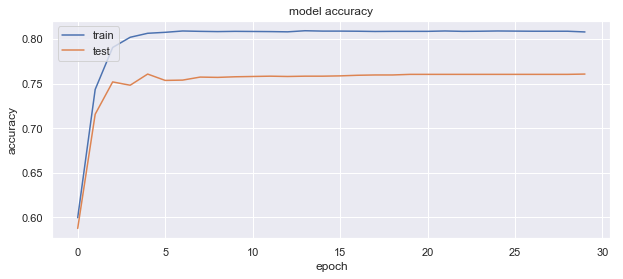

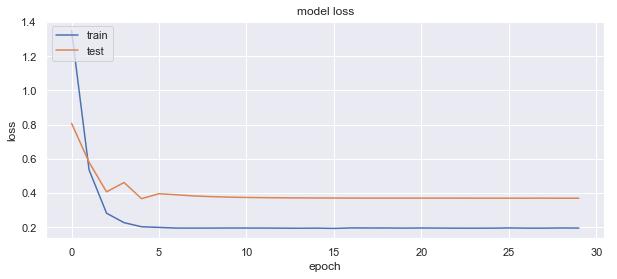

In [23]:
rcParams['figure.figsize'] = 10, 4
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Load the model and test

In [24]:
model.load_weights("HAR_weights.hdf5")
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

In [25]:
print(classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       496
           1       0.97      0.85      0.90       471
           2       0.74      1.00      0.85       420
           3       0.48      0.99      0.65       491
           4       0.00      0.00      0.00       532
           5       1.00      1.00      1.00       537

   micro avg       0.76      0.76      0.76      2947
   macro avg       0.69      0.77      0.71      2947
weighted avg       0.68      0.76      0.70      2947



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Confusion matrix

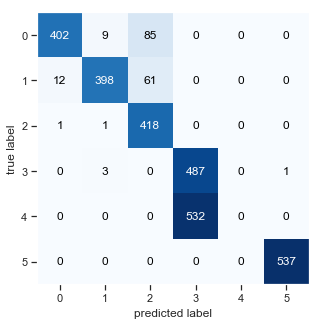

In [26]:
CM = confusion_matrix(y_true, pred)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(10, 5))
plt.show()